In [2]:
from signals import *
import pandas as pd
import numpy as np
from indicators import ATR
from matplotlib import pyplot as plt
from math import exp, log

%matplotlib inline

df = load_ticker("EURUSD", 60)
begin = df.index[0]
end = df.index[-1]
days = (end-begin).days
all_months = days * 12 / 365


### Hedge Signal

2019-01-21 23:00:00: -0.6000000000006551 H:1.137, L:1.1367, BUY, TP:1.1379, SL:1.13689  LOSS
2019-01-22 00:00:00: -0.6000000000006551 H:1.137, L:1.1367, SELL, TP:1.1359000000000001, SL:1.13691  LOSS
2019-01-22 00:00:00: -0.6000000000006551 H:1.137, L:1.1367, SELL, TP:1.1357000000000002, SL:1.13671  LOSS
2019-01-22 01:00:00: -0.6000000000006551 H:1.1371, L:1.1365, BUY, TP:1.1377, SL:1.13669  LOSS
2019-01-22 01:00:00: -0.6000000000006551 H:1.1371, L:1.1365, SELL, TP:1.1357000000000002, SL:1.13671  LOSS
2019-01-22 02:00:00: -0.6000000000006551 H:1.1369, L:1.1365, BUY, TP:1.1377, SL:1.13669  LOSS
2019-01-22 02:00:00: -0.6000000000006551 H:1.1369, L:1.1365, SELL, TP:1.1358000000000001, SL:1.13681  LOSS
2019-01-22 03:00:00: -0.6000000000006551 H:1.1369, L:1.1361, BUY, TP:1.1378, SL:1.13679  LOSS
2019-01-22 03:00:00: -0.6000000000006551 H:1.1369, L:1.1361, SELL, TP:1.1357000000000002, SL:1.13671  LOSS
2019-01-22 04:00:00: -0.6000000000006551 H:1.1361, L:1.1355, BUY, TP:1.1377, SL:1.13669  LOS

2019-02-20 08:00:00: -0.6000000000006551 H:1.1352, L:1.1336, SELL, TP:1.1327, SL:1.13371  LOSS
2019-02-20 08:00:00: -0.6000000000006551 H:1.1352, L:1.1336, BUY, TP:1.1352, SL:1.13419  LOSS
2019-02-20 09:00:00: -0.6000000000006551 H:1.1357, L:1.134, SELL, TP:1.1323, SL:1.13331  LOSS
2019-02-20 09:00:00: -0.6000000000006551 H:1.1357, L:1.134, BUY, TP:1.1353, SL:1.13429  LOSS
2019-02-20 10:00:00: -0.6000000000006551 H:1.1347, L:1.1336, SELL, TP:1.1332000000000002, SL:1.1342100000000002  LOSS
2019-02-20 10:00:00: -0.6000000000006551 H:1.1347, L:1.1336, BUY, TP:1.1356, SL:1.13459  LOSS
2019-02-20 11:00:00: 9.499999999998899 H:1.1341, L:1.1329, SELL, TP:1.1333000000000002, SL:1.1343100000000002  WIN
2019-02-20 11:00:00: -0.6000000000006551 H:1.1341, L:1.1329, BUY, TP:1.1351, SL:1.13409  LOSS
2019-02-20 12:00:00: 9.499999999998899 H:1.1344, L:1.1324, SELL, TP:1.1336000000000002, SL:1.1346100000000001  WIN
2019-02-20 12:00:00: -0.6000000000006551 H:1.1344, L:1.1324, BUY, TP:1.1343999999999999,

2019-03-18 00:00:00: -0.6000000000006551 H:1.1323, L:1.1318, BUY, TP:1.1335, SL:1.13249  LOSS
2019-03-18 00:00:00: -0.6000000000006551 H:1.1323, L:1.1318, SELL, TP:1.1308, SL:1.13181  LOSS
2019-03-18 01:00:00: -0.6000000000006551 H:1.1325, L:1.1319, SELL, TP:1.1309, SL:1.13191  LOSS
2019-03-18 02:00:00: 9.499999999998899 H:1.1331, L:1.1323, BUY, TP:1.1326999999999998, SL:1.1316899999999999  WIN
2019-03-18 02:00:00: 9.499999999998899 H:1.1331, L:1.1323, BUY, TP:1.1327999999999998, SL:1.1317899999999999  WIN
2019-03-18 02:00:00: -0.6000000000006551 H:1.1331, L:1.1323, BUY, TP:1.1335, SL:1.13249  LOSS
2019-03-18 03:00:00: -0.6000000000006551 H:1.1337, L:1.133, SELL, TP:1.1315000000000002, SL:1.1325100000000001  LOSS
2019-03-18 03:00:00: -0.6000000000006551 H:1.1337, L:1.133, SELL, TP:1.1315000000000002, SL:1.1325100000000001  LOSS
2019-03-18 03:00:00: -0.6000000000006551 H:1.1337, L:1.133, SELL, TP:1.1321, SL:1.13311  LOSS
2019-03-18 04:00:00: 9.499999999998899 H:1.1337, L:1.1333, BUY, TP

2019-04-12 09:00:00: -0.6000000000006551 H:1.1308, L:1.1286, BUY, TP:1.1297, SL:1.12869  LOSS
2019-04-12 10:00:00: 9.499999999998899 H:1.1313, L:1.1303, BUY, TP:1.1293, SL:1.12829  WIN
2019-04-12 10:00:00: -0.6000000000006551 H:1.1313, L:1.1303, BUY, TP:1.1314, SL:1.13039  LOSS
2019-04-12 11:00:00: -0.6000000000006551 H:1.1317, L:1.1304, SELL, TP:1.1277000000000001, SL:1.12871  LOSS
2019-04-12 11:00:00: -0.6000000000006551 H:1.1317, L:1.1304, BUY, TP:1.1321999999999999, SL:1.13119  LOSS
2019-04-12 12:00:00: -0.6000000000006551 H:1.132, L:1.1306, SELL, TP:1.1294000000000002, SL:1.1304100000000001  LOSS
2019-04-12 12:00:00: -0.6000000000006551 H:1.132, L:1.1306, BUY, TP:1.1320999999999999, SL:1.13109  LOSS
2019-04-12 13:00:00: -0.6000000000006551 H:1.1321, L:1.1305, SELL, TP:1.1302, SL:1.13121  LOSS
2019-04-12 13:00:00: -0.6000000000006551 H:1.1321, L:1.1305, BUY, TP:1.1316, SL:1.13059  LOSS
2019-04-12 14:00:00: -0.6000000000006551 H:1.1322, L:1.131, SELL, TP:1.1301, SL:1.13111  LOSS
201

2019-05-07 05:00:00: 9.499999999998899 H:1.1213, L:1.1204, BUY, TP:1.1213, SL:1.12029  WIN
2019-05-07 05:00:00: -0.6000000000006551 H:1.1213, L:1.1204, BUY, TP:1.1215, SL:1.12049  LOSS
2019-05-07 06:00:00: -0.6000000000006551 H:1.1214, L:1.1207, SELL, TP:1.1194000000000002, SL:1.1204100000000001  LOSS
2019-05-07 06:00:00: -0.6000000000006551 H:1.1214, L:1.1207, BUY, TP:1.1221999999999999, SL:1.12119  LOSS
2019-05-07 07:00:00: -0.6000000000006551 H:1.1216, L:1.1205, SELL, TP:1.1195000000000002, SL:1.1205100000000001  LOSS
2019-05-07 07:00:00: -0.6000000000006551 H:1.1216, L:1.1205, BUY, TP:1.1223999999999998, SL:1.1213899999999999  LOSS
2019-05-07 08:00:00: -0.6000000000006551 H:1.1215, L:1.1193, SELL, TP:1.1202, SL:1.12121  LOSS
2019-05-07 08:00:00: -0.6000000000006551 H:1.1215, L:1.1193, BUY, TP:1.1219, SL:1.12089  LOSS
2019-05-07 09:00:00: 9.499999999998899 H:1.12, L:1.1192, SELL, TP:1.1204, SL:1.12141  WIN
2019-05-07 09:00:00: -0.6000000000006551 H:1.12, L:1.1192, BUY, TP:1.12029999

2019-05-30 22:00:00: -0.6000000000006551 H:1.113, L:1.1127, BUY, TP:1.1142999999999998, SL:1.11329  LOSS
2019-05-30 22:00:00: -0.6000000000006551 H:1.113, L:1.1127, SELL, TP:1.1118000000000001, SL:1.11281  LOSS
2019-05-30 23:00:00: -0.6000000000006551 H:1.1132, L:1.1128, BUY, TP:1.1139, SL:1.11289  LOSS
2019-05-31 00:00:00: -0.6000000000006551 H:1.1133, L:1.1128, SELL, TP:1.1119, SL:1.11291  LOSS
2019-05-31 00:00:00: -0.6000000000006551 H:1.1133, L:1.1128, SELL, TP:1.1122, SL:1.11321  LOSS
2019-05-31 01:00:00: -0.6000000000006551 H:1.1139, L:1.1128, SELL, TP:1.1126, SL:1.11361  LOSS
2019-05-31 01:00:00: 9.499999999998899 H:1.1139, L:1.1128, BUY, TP:1.1138, SL:1.11279  WIN
2019-05-31 01:00:00: 9.499999999998899 H:1.1139, L:1.1128, BUY, TP:1.1138, SL:1.11279  WIN
2019-05-31 02:00:00: -0.6000000000006551 H:1.1137, L:1.1132, SELL, TP:1.1126, SL:1.11361  LOSS
2019-05-31 02:00:00: -0.6000000000006551 H:1.1137, L:1.1132, SELL, TP:1.1118000000000001, SL:1.11281  LOSS
2019-05-31 02:00:00: -0.60

2019-06-25 03:00:00: -0.6000000000006551 H:1.1406, L:1.14, BUY, TP:1.1415, SL:1.14049  LOSS
2019-06-25 04:00:00: -0.6000000000006551 H:1.1407, L:1.14, SELL, TP:1.1395000000000002, SL:1.1405100000000001  LOSS
2019-06-25 04:00:00: -0.6000000000006551 H:1.1407, L:1.14, SELL, TP:1.1391, SL:1.14011  LOSS
2019-06-25 05:00:00: 9.499999999998899 H:1.141, L:1.1404, BUY, TP:1.1407999999999998, SL:1.1397899999999999  WIN
2019-06-25 05:00:00: -0.6000000000006551 H:1.141, L:1.1404, BUY, TP:1.1415, SL:1.14049  LOSS
2019-06-25 06:00:00: -0.6000000000006551 H:1.1409, L:1.1391, BUY, TP:1.1409999999999998, SL:1.1399899999999998  LOSS
2019-06-25 06:00:00: -0.6000000000006551 H:1.1409, L:1.1391, SELL, TP:1.1395000000000002, SL:1.1405100000000001  LOSS
2019-06-25 06:00:00: 9.499999999998899 H:1.1409, L:1.1391, SELL, TP:1.1399000000000001, SL:1.14091  WIN
2019-06-25 07:00:00: -0.6000000000006551 H:1.1403, L:1.1392, BUY, TP:1.1410999999999998, SL:1.1400899999999998  LOSS
2019-06-25 07:00:00: 9.49999999999889

2019-07-26 02:00:00: -0.6000000000006551 H:1.1149, L:1.1145, SELL, TP:1.1136000000000001, SL:1.11461  LOSS
2019-07-26 02:00:00: -0.6000000000006551 H:1.1149, L:1.1145, SELL, TP:1.1134000000000002, SL:1.1144100000000001  LOSS
2019-07-26 02:00:00: -0.6000000000006551 H:1.1149, L:1.1145, SELL, TP:1.1135000000000002, SL:1.1145100000000001  LOSS
2019-07-26 03:00:00: -0.6000000000006551 H:1.1149, L:1.1146, SELL, TP:1.1135000000000002, SL:1.1145100000000001  LOSS
2019-07-26 03:00:00: -0.6000000000006551 H:1.1149, L:1.1146, SELL, TP:1.1136000000000001, SL:1.11461  LOSS
2019-07-26 04:00:00: -0.6000000000006551 H:1.1149, L:1.1144, BUY, TP:1.1155, SL:1.11449  LOSS
2019-07-26 04:00:00: -0.6000000000006551 H:1.1149, L:1.1144, BUY, TP:1.1157, SL:1.11469  LOSS
2019-07-26 05:00:00: -0.6000000000006551 H:1.1148, L:1.1145, BUY, TP:1.1156, SL:1.11459  LOSS
2019-07-26 05:00:00: -0.6000000000006551 H:1.1148, L:1.1145, BUY, TP:1.1158, SL:1.11479  LOSS
2019-07-26 06:00:00: -0.6000000000006551 H:1.1147, L:1.1

2019-08-22 01:00:00: -0.6000000000006551 H:1.1089, L:1.1083, BUY, TP:1.1096, SL:1.10859  LOSS
2019-08-22 01:00:00: -0.6000000000006551 H:1.1089, L:1.1083, BUY, TP:1.1098999999999999, SL:1.10889  LOSS
2019-08-22 02:00:00: -0.6000000000006551 H:1.1087, L:1.1083, BUY, TP:1.1095, SL:1.10849  LOSS
2019-08-22 03:00:00: -0.6000000000006551 H:1.1089, L:1.1085, SELL, TP:1.1075000000000002, SL:1.10851  LOSS
2019-08-22 03:00:00: -0.6000000000006551 H:1.1089, L:1.1085, SELL, TP:1.1075000000000002, SL:1.10851  LOSS
2019-08-22 04:00:00: -0.6000000000006551 H:1.1088, L:1.1084, BUY, TP:1.1095, SL:1.10849  LOSS
2019-08-22 04:00:00: -0.6000000000006551 H:1.1088, L:1.1084, SELL, TP:1.1076000000000001, SL:1.10861  LOSS
2019-08-22 05:00:00: -0.6000000000006551 H:1.1086, L:1.108, BUY, TP:1.1093, SL:1.10829  LOSS
2019-08-22 05:00:00: -0.6000000000006551 H:1.1086, L:1.108, BUY, TP:1.1096, SL:1.10859  LOSS
2019-08-22 05:00:00: -0.6000000000006551 H:1.1086, L:1.108, SELL, TP:1.1075000000000002, SL:1.10851  LOSS

2019-09-16 07:00:00: -0.6000000000006551 H:1.1075, L:1.1066, SELL, TP:1.1064, SL:1.10741  LOSS
2019-09-16 07:00:00: -0.6000000000006551 H:1.1075, L:1.1066, SELL, TP:1.1062, SL:1.10721  LOSS
2019-09-16 07:00:00: -0.6000000000006551 H:1.1075, L:1.1066, SELL, TP:1.1057000000000001, SL:1.10671  LOSS
2019-09-16 08:00:00: -0.6000000000006551 H:1.1081, L:1.1066, BUY, TP:1.1081999999999999, SL:1.10719  LOSS
2019-09-16 08:00:00: -0.6000000000006551 H:1.1081, L:1.1066, BUY, TP:1.1078999999999999, SL:1.10689  LOSS
2019-09-16 09:00:00: -0.6000000000006551 H:1.1071, L:1.1057, BUY, TP:1.1077, SL:1.10669  LOSS
2019-09-16 09:00:00: -0.6000000000006551 H:1.1071, L:1.1057, BUY, TP:1.1080999999999999, SL:1.10709  LOSS
2019-09-16 10:00:00: 9.499999999998899 H:1.1068, L:1.1057, SELL, TP:1.1059, SL:1.10691  WIN
2019-09-16 10:00:00: -0.6000000000006551 H:1.1068, L:1.1057, BUY, TP:1.1069, SL:1.10589  LOSS
2019-09-16 11:00:00: 9.499999999998899 H:1.1059, L:1.104, SELL, TP:1.1061, SL:1.10711  WIN
2019-09-16 11:

2019-10-07 09:00:00: -0.6000000000006551 H:1.0972, L:1.0961, BUY, TP:1.0980999999999999, SL:1.09709  LOSS
2019-10-07 10:00:00: 9.499999999998899 H:1.0975, L:1.0962, SELL, TP:1.0967, SL:1.09771  WIN
2019-10-07 10:00:00: -0.6000000000006551 H:1.0975, L:1.0962, BUY, TP:1.0973, SL:1.09629  LOSS
2019-10-07 11:00:00: -0.6000000000006551 H:1.0977, L:1.0969, SELL, TP:1.0961, SL:1.09711  LOSS
2019-10-07 11:00:00: -0.6000000000006551 H:1.0977, L:1.0969, BUY, TP:1.0983999999999998, SL:1.0973899999999999  LOSS
2019-10-07 12:00:00: -0.6000000000006551 H:1.0988, L:1.0975, SELL, TP:1.0953000000000002, SL:1.0963100000000001  LOSS
2019-10-07 12:00:00: -0.6000000000006551 H:1.0988, L:1.0975, BUY, TP:1.0988, SL:1.09779  LOSS
2019-10-07 13:00:00: -0.6000000000006551 H:1.0994, L:1.0984, SELL, TP:1.0964, SL:1.09741  LOSS
2019-10-07 13:00:00: -0.6000000000006551 H:1.0994, L:1.0984, BUY, TP:1.0997999999999999, SL:1.09879  LOSS
2019-10-07 14:00:00: -0.6000000000006551 H:1.0999, L:1.0986, SELL, TP:1.09680000000

2019-10-28 23:00:00: -0.6000000000006551 H:1.1098, L:1.1096, SELL, TP:1.1087, SL:1.10971  LOSS
2019-10-29 00:00:00: -0.6000000000006551 H:1.1098, L:1.1095, BUY, TP:1.1106999999999998, SL:1.1096899999999998  LOSS
2019-10-29 00:00:00: -0.6000000000006551 H:1.1098, L:1.1095, SELL, TP:1.1087, SL:1.10971  LOSS
2019-10-29 01:00:00: 9.499999999998899 H:1.1097, L:1.109, SELL, TP:1.1091000000000002, SL:1.1101100000000002  WIN
2019-10-29 01:00:00: -0.6000000000006551 H:1.1097, L:1.109, BUY, TP:1.1105999999999998, SL:1.1095899999999999  LOSS
2019-10-29 02:00:00: -0.6000000000006551 H:1.1101, L:1.1093, BUY, TP:1.1106999999999998, SL:1.1096899999999998  LOSS
2019-10-29 02:00:00: -0.6000000000006551 H:1.1101, L:1.1093, SELL, TP:1.1083, SL:1.10931  LOSS
2019-10-29 03:00:00: -0.6000000000006551 H:1.1096, L:1.1093, BUY, TP:1.1105999999999998, SL:1.1095899999999999  LOSS
2019-10-29 04:00:00: -0.6000000000006551 H:1.1095, L:1.1092, BUY, TP:1.1102999999999998, SL:1.1092899999999999  LOSS
2019-10-29 04:00:

2019-11-20 03:00:00: -0.6000000000006551 H:1.1074, L:1.1071, SELL, TP:1.106, SL:1.10701  LOSS
2019-11-20 03:00:00: -0.6000000000006551 H:1.1074, L:1.1071, SELL, TP:1.1063, SL:1.10731  LOSS
2019-11-20 04:00:00: -0.6000000000006551 H:1.1073, L:1.1072, BUY, TP:1.1082999999999998, SL:1.1072899999999999  LOSS
2019-11-20 04:00:00: -0.6000000000006551 H:1.1073, L:1.1072, SELL, TP:1.1062, SL:1.10721  LOSS
2019-11-20 05:00:00: -0.6000000000006551 H:1.1074, L:1.1071, BUY, TP:1.1081999999999999, SL:1.10719  LOSS
2019-11-20 05:00:00: -0.6000000000006551 H:1.1074, L:1.1071, SELL, TP:1.1062, SL:1.10721  LOSS
2019-11-20 06:00:00: -0.6000000000006551 H:1.1073, L:1.1069, BUY, TP:1.1081999999999999, SL:1.10719  LOSS
2019-11-20 06:00:00: -0.6000000000006551 H:1.1073, L:1.1069, SELL, TP:1.1062, SL:1.10721  LOSS
2019-11-20 07:00:00: 9.499999999998899 H:1.1071, L:1.1065, SELL, TP:1.1067, SL:1.10771  WIN
2019-11-20 07:00:00: -0.6000000000006551 H:1.1071, L:1.1065, BUY, TP:1.1081999999999999, SL:1.10719  LOSS

2019-12-18 02:00:00: 9.499999999998899 H:1.1141, L:1.1133, SELL, TP:1.1136000000000001, SL:1.11461  WIN
2019-12-18 02:00:00: -0.6000000000006551 H:1.1141, L:1.1133, SELL, TP:1.1129, SL:1.11391  LOSS
2019-12-18 03:00:00: 9.499999999998899 H:1.1136, L:1.113, SELL, TP:1.114, SL:1.11501  WIN
2019-12-18 03:00:00: -0.6000000000006551 H:1.1136, L:1.113, BUY, TP:1.1144999999999998, SL:1.1134899999999999  LOSS
2019-12-18 04:00:00: -0.6000000000006551 H:1.1133, L:1.1131, BUY, TP:1.1148999999999998, SL:1.1138899999999998  LOSS
2019-12-18 04:00:00: -0.6000000000006551 H:1.1133, L:1.1131, BUY, TP:1.1141999999999999, SL:1.11319  LOSS
2019-12-18 05:00:00: -0.6000000000006551 H:1.1133, L:1.1128, SELL, TP:1.1122, SL:1.11321  LOSS
2019-12-18 05:00:00: -0.6000000000006551 H:1.1133, L:1.1128, SELL, TP:1.1121, SL:1.11311  LOSS
2019-12-18 06:00:00: -0.6000000000006551 H:1.1136, L:1.1133, SELL, TP:1.1125, SL:1.11351  LOSS
2019-12-18 06:00:00: -0.6000000000006551 H:1.1136, L:1.1133, SELL, TP:1.1123, SL:1.1133

2020-01-16 02:00:00: -0.6000000000006551 H:1.1152, L:1.1149, BUY, TP:1.1160999999999999, SL:1.11509  LOSS
2020-01-16 02:00:00: -0.6000000000006551 H:1.1152, L:1.1149, BUY, TP:1.1161999999999999, SL:1.11519  LOSS
2020-01-16 03:00:00: -0.6000000000006551 H:1.1153, L:1.115, SELL, TP:1.1142, SL:1.11521  LOSS
2020-01-16 03:00:00: -0.6000000000006551 H:1.1153, L:1.115, SELL, TP:1.114, SL:1.11501  LOSS
2020-01-16 04:00:00: -0.6000000000006551 H:1.1152, L:1.115, BUY, TP:1.1161999999999999, SL:1.11519  LOSS
2020-01-16 05:00:00: -0.6000000000006551 H:1.1151, L:1.1148, BUY, TP:1.1159, SL:1.11489  LOSS
2020-01-16 05:00:00: -0.6000000000006551 H:1.1151, L:1.1148, BUY, TP:1.1159999999999999, SL:1.11499  LOSS
2020-01-16 05:00:00: -0.6000000000006551 H:1.1151, L:1.1148, BUY, TP:1.1159999999999999, SL:1.11499  LOSS
2020-01-16 06:00:00: -0.6000000000006551 H:1.1149, L:1.1144, BUY, TP:1.1158, SL:1.11479  LOSS
2020-01-16 06:00:00: -0.6000000000006551 H:1.1149, L:1.1144, BUY, TP:1.1158, SL:1.11479  LOSS
20

2020-03-09 04:00:00: 9.499999999998899 H:1.1422, L:1.1396, SELL, TP:1.1419000000000001, SL:1.14291  WIN
2020-03-09 04:00:00: -0.6000000000006551 H:1.1422, L:1.1396, BUY, TP:1.142, SL:1.14099  LOSS
2020-03-09 05:00:00: -0.6000000000006551 H:1.1423, L:1.1384, SELL, TP:1.1381000000000001, SL:1.13911  LOSS
2020-03-09 05:00:00: -0.6000000000006551 H:1.1423, L:1.1384, BUY, TP:1.1410999999999998, SL:1.1400899999999998  LOSS
2020-03-09 06:00:00: 9.499999999998899 H:1.1408, L:1.138, SELL, TP:1.1400000000000001, SL:1.14101  WIN
2020-03-09 06:00:00: -0.6000000000006551 H:1.1408, L:1.138, BUY, TP:1.1395, SL:1.13849  LOSS
2020-03-09 07:00:00: -0.6000000000006551 H:1.1474, L:1.1398, SELL, TP:1.1391, SL:1.14011  LOSS
2020-03-09 07:00:00: 9.499999999998899 H:1.1474, L:1.1398, BUY, TP:1.1407999999999998, SL:1.1397899999999999  WIN
2020-03-09 08:00:00: -0.6000000000006551 H:1.1438, L:1.1389, SELL, TP:1.1375000000000002, SL:1.1385100000000001  LOSS
2020-03-09 08:00:00: -0.6000000000006551 H:1.1438, L:1.1

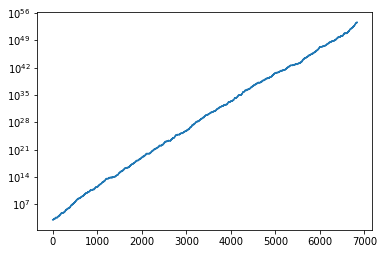

2.6696989555798898e+53


In [74]:
def intraday_hedge(ticker, frequency, tp_pips, sl_pips, risk=0.001):
    class Trade:
        def __init__(self, open_, tp, sl, ppp):
            self.open = open_
            self.tp = tp
            self.sl = sl
            self.buy = tp > sl
            self.sell = not self.buy
            self.ppp = ppp
            self.exit = None
        
        def __str__(self):
            return f"{'BUY' if self.buy else 'SELL'}, TP:{self.tp}, SL:{self.sl} "
        
        def tick(self, o, h, l, c):
            if self.buy:
                if l <= self.sl:
                    self.exit = self.sl - self.open
                elif h >= self.tp:
                    self.exit = self.tp - self.open

            if self.sell:
                if h >= self.sl:
                    self.exit = self.open - self.sl
                elif l <= self.tp:
                    self.exit = self.open - self.tp

            return self.exit
        
        def balance(self, current):
            if self.buy:
                return (current - self.open) * self.ppp * pip_factor(ticker)
            if self.sell:
                return (self.open - current) * self.ppp * pip_factor(ticker)
        
    trades = []
    pips = 0
    balance = 1000
    balances = [balance]
    fees_pips = 0.5
    risk_pips = sl_pips
    tp_del = tp_pips / pip_factor(ticker)
    sl_del = sl_pips / pip_factor(ticker)
    wins = 0
    lose = 0
    final_price = 0

    df = load_ticker(ticker, frequency)

    for dt, row in df.iterrows():
        o,h,l,c = row["Open"], row["High"], row["Low"], row["Close"]
        pounds_per_pip = (risk * balance) / (risk_pips)
        trades.append(Trade(open_=o, tp=(o + tp_del), sl=(o - sl_del), ppp=pounds_per_pip))
        trades.append(Trade(open_=o, tp=(o - tp_del), sl=(o + sl_del), ppp=pounds_per_pip))
        
        for trade in trades:
            exit = trade.tick(o,h,l,c)
            if exit:
                if exit > 0:
                    wins += 1
                else:
                    lose += 1
                pip_del = exit * pip_factor(ticker)
                pips += pip_del - fees_pips
                balance += pounds_per_pip * (pip_del - fees_pips)

                print(f"{dt}: {pip_del - fees_pips} H:{h}, L:{l}, {trade} {'WIN' if exit > 0 else 'LOSS'}")
                #print(f"{balance} {'WIN' if exit > 0 else 'LOSS'}")

                trades.remove(trade)
                
        balances.append(balance)
        final_price = c
  
    outstanding_balance = 0 
    for trade in trades:
        outstanding_balance += trade.balance(final_price)
    print(len(trades), wins/(wins+lose), outstanding_balance)
    plt.plot(balances)
    plt.yscale('log')
    plt.show()

    return balance + outstanding_balance

print(intraday_hedge("EURUSD", 60, tp_pips=10., sl_pips=0.1, risk=0.001))


In [87]:
best = -1
sl_b = 0
tp_b = 0
for tp in range(1, 31):
    print(tp)
    for sl in range(1, 10):
        current = intraday_hedge("EURUSD", 30, tp_pips=tp, sl_pips=sl)
        if current > best:
            best = current
            sl_b = sl
            tp_b  = tp
print(best, tp_b, sl_b)

1
5 0.6609226941791974
5 0.6652398199978049
5 0.6784472981377822
5 0.6954231149160356
5 0.7178868034976036
5 0.7356675081403432
5 0.7529360114147734
5 0.7702411005012256
5 0.7880949767680093
2
5 0.5749094501152453
5 0.5908242783448578
5 0.6168733765045915
5 0.6408004975670435
5 0.6698496323125892
5 0.6918742911498921
5 0.7130208904986646
5 0.7337650459151941
5 0.7536677276552153
3
5 0.4974207002524421
5 0.5136648007902536
5 0.5499213405041525
5 0.5870925255186039
5 0.6203124428346687
5 0.6500201221966122
5 0.6744228588153514
5 0.6984597373138697
5 0.7182892474298467
4
5 0.43259064134928477
5 0.45446895693849926
5 0.4859327552775034
5 0.5313357479969268
5 0.5731899169502067
5 0.6060073903340285
5 0.6341418797790217
5 0.6583616873376504
5 0.6830205246405444
5
5 0.3798704862254418
5 0.4045293235283357
5 0.4365784948596934
5 0.47462773936267516
5 0.5210185490066952
5 0.5610434273588703
5 0.5944828595470677
5 0.6225075915559946
5 0.6481176599714631
6
5 0.3406139099257308
5 0.366260564153221

In [11]:
def search_for(ticker):

    def objective(params):
        return supertrend_signals(ticker=ticker, frequency=60, **params)
    

    space = {'multiplier': hp.quniform('multiplier', 2, 50, 0.1),
             'period': hp.quniform('period', 2, 200, 1),
             'cci_period': hp.quniform('cci_period', 2, 200, 1),
             'take_profit': hp.quniform('take_profit', 10, 50, 1),
             'stop_loss': hp.quniform('stop_loss', 10, 50, 1)
            }
    print(f"{ticker}:")
    for _ in range(3):
        print(fmin(objective, space, algo=tpe.suggest, max_evals=5120))


In [45]:
search_for("EURUSD")
search_for("AUDCAD")
search_for("EURAUD")
search_for("EURCHF")
search_for("EURGBP")
search_for("GBPJPY")
search_for("GBPUSD")
search_for("USDCAD")
search_for("USDCHF")
search_for("USDJPY")
search_for("AUDUSD")
search_for("EURJPY")

# TODO: Second derivative of result wrt each parameter, want to minimise that to to avoid the 'edges'
# TODO: Bucket trades into bins and work out the sharpe ratio and the 


EURUSD:
 99%|█████████▉| 5063/5120 [3:07:54<02:06,  2.23s/trial, best loss: -2981.03451669653]   


KeyboardInterrupt: 

### Grid search for SL + TP

In [ ]:
def find_levels(ticker, frequency, multiplier, period, verbose=False):
    tps = list(range(50, 260, 10))
    sls = list(range(10, 60, 10))
    pfs = np.empty((len(sls), len(tps)))

    for t_idx, tp in enumerate(tps):
        for s_idx, sl in enumerate(sls):
            one_hour["take_profit"] = tp
            one_hour["stop_loss"] = sl
            pf = supertrend_signals(**one_hour, tp_follow=True)
            pfs[s_idx][t_idx] = -pf
    return tps, sls, pfs

In [ ]:
tps, sls, pfs = find_levels(ticker="EURUSD", frequency=60, multiplier=4.8, period=63)

In [ ]:
plt.figure(figsize=(100,10))
fig, ax = plt.subplots()
CS = ax.contour(tps, sls, pfs)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=pfs, x=tps, y=sls)])
fig.show()

### Line search for Period

In [ ]:
periods = range(50, 90, 1)
balances = []
for period in periods:
    balances.append(-supertrend_signals("EURUSD", frequency=60, multiplier=4.8, period=period, 
                          take_profit=127, stop_loss=46, verbose=False, risk=0.05))
plt.plot(periods, balances)

### Line search for Multiplier

In [ ]:
multipliers = [x/10. for x in range(40, 61)]
balances = []
for multiplier in multipliers:
    balances.append(-supertrend_signals("EURUSD", frequency=60, multiplier=multiplier, period=63, 
                          take_profit=127, stop_loss=46, verbose=False, risk=0.05))
plt.plot(multipliers, balances)

### Optimal Risk analysis

In [ ]:
risks = [x/100. for x in range(1, 100)]
balances = []
for risk in risks:
    balances.append(-supertrend_signals(**one_sec, risk=risk))
plt.plot(risks, balances)

##     #return -profit_pips
    #return -profit_pips / stop_loss # Minimise stop loss
    #return -np.mean(profits)/np.std(profits) # Sharpe Ratio
    #return -1.*win/(win+loss)   

Balance 5705, 5% risk
print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=63, take_profit=123, stop_loss=21, verbose=False))

#Profit (30 mins) 2019
#print(-supertrend_signals(ticker, frequency=30, multiplier=8, period=110, take_profit=120, stop_loss=70, verbose=True))

Profit (60 mins) 2081
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=123, stop_loss=75, verbose=True))

Sharpe Ratio (0.69) 1416
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=53, take_profit=47, stop_loss=199, verbose=True))

Stop loss reduced profit 849
#print(-supertrend_signals(ticker, frequency=60, multiplier=5, period=54, take_profit=72, stop_loss=28, verbose=True))

In [ ]:
def meta_super_trend(df, sample_mins, period, multiplier):

    ohlc_dict = {'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last'}
    base_interval = (df.index[1]-df.index[0]).components.minutes
    dfs = []
    for base in range(0, sample_mins, base_interval):
        tmp = df.resample(f"{sample_mins}Min", base=base).apply(ohlc_dict).dropna()
        SuperTrend(tmp, period, multiplier, prefix=sample_mins)
        dfs.append(tmp)

    return pd.concat(dfs).sort_index()